In [6]:
import pandas as pd
import requests
dataframe = pd.read_csv('first_and_last_names.csv', encoding = "ISO-8859-1")
dir = 'downloaded_images/'
img_links = dataframe.iloc[:,:]
img_numbers = list(range(0, 6759))



ParserError: Error tokenizing data. C error: Expected 2 fields in line 20, saw 4


In [ ]:
for i,url in enumerate(img_links['image_url']):
    print('Downloading Image\t{0}'.format(img_numbers[i]))
    image=requests.get(url, stream=True)
    if image.status_code==200:
        with open(dir+'image_'+str(img_numbers[i])+'.jpg','wb')as f:
            for chunk in image.iter_content(1024):
                f.write(chunk)

In [33]:
import cv2
import glob
i=0
dir = 'cropped_images/'
base_directory = 'downloaded_images/'
total_files=len(glob.glob('downloaded_images/*.jpg'))
for i in range(total_files):
    try:
        img = cv2.imread(base_directory+'image_'+str(i)+'.jpg')
        img = img[0:36, 74:388]
        img = img.copy(order='C')
        cv2.imwrite('./cropped_images/img_'+str(i)+'.jpg', img)
    except Exception as e: 
        print(e)
        continue

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=314x36 at 0x23977E44CC0>
(36, 314, 3)


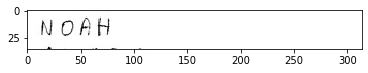

In [105]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    print(img)
    data = np.asarray( img, dtype="int32" )
    return data

arr = load_image('cropped_images/img_13.jpg')
print(arr.shape)
arr = arr.transpose(2,0,1).reshape(-1,arr.shape[1])
plt.imshow(mpimg.imread('cropped_images/img_13.jpg'))

In [106]:
print(arr.shape)

(108, 314)


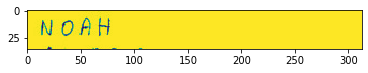

In [107]:
arr = arr[0:36, :313]
plt.imshow(arr)

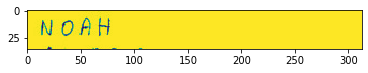

In [108]:
plt.imshow(arr)

In [109]:
newstart = 0
count = 0
for x in range(len(arr)):
    for y in range(newstart, len(arr[x])):
        if(arr[x][y] <= 250):
            y+=25
            newstart = y
            count+=1 
    
print(count)

6


In [110]:
arr.shape

(36, 313)

254.0


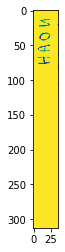

In [137]:
from numpy import empty
arr2 = empty([313,36])
for x in range(len(arr)):
    for y in range(len(arr[x])):
        arr2[y][x] = arr[x][y]
plt.imshow(arr2)

print(arr2[20][20])

In [140]:
count = 0
onChar = False
ycount = 0
rowcount = 0
for x in range(len(arr2)):
    rowcount = 0
    for y in range(len(arr2[x])):
        if arr2[x][y] <= 150: 
            if onChar == False:
                onChar = True
        if y == len(arr2[x]) and onChar == True:
            count+=1
            onChar = False
print(count)

0
